In [1]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt

# to import the files in path
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from src.arbitrage import check_arbitrage_opportunities
from src.hyphen_liquidity_pools import compute_transfer_fee

Let's define the following:
- $a$ the amount that we deposit and want to transfer
- $r(x)$ the reward received from the incentive pool for depositingan amount  $x$
- $g$ the gas fees paid on chain (does not depend on the amount deposited/transferred)
- $f(x)$ the transfer fees (both for LP and IP) for transfering an amount $x$

Then the amount received on the toChain is given by:

$$output = a+r - f(a) - g$$

In [2]:
check_arbitrage_opportunities()

Arbitrage detected for ETH on Ethereum: 
    - Profit=$ 0.0038 
    - amount_in= 0.0076 ETH ~$ 10.0


(0.003751356868119887,
 0,
 'Ethereum',
 '0xEeeeeEeeeEeEeeEeEeEeeEEEeeeeEeeeeeeeEEeE')

Making sure we get the same curve fee as describeded in Biconomy's documentation

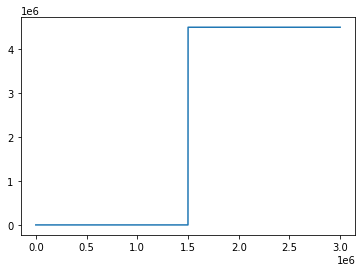

In [2]:
fees=[]
lr=[]
for amount in range(0,3000000):
    f = compute_transfer_fee(amount, 3000000,1500000,0.1,0.001,excess_state_transfer_fee=excess_state_transfer_fee,depth=2)
    fees.append(f)
    lr.append(3000000-amount)
plt.plot(lr[::-1], fees[::-1])

In [11]:
# expect true
fees.index(0.001)==1500000

True

In [1]:
# expect true
max(fees)<=0.1

NameError: name 'fees' is not defined

## Show unbalances

In [2]:
int(10e18)

10000000000000000000

In [1]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt

# to import the files in path
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from src.hyphen_liquidity_pools import *
from src.hyphen_rpc import *
from src.read import *
from src.arbitrage import *
liquidity_pools = read_liquidity_pools()
supported_assets = read_supported_assets()
chain_ids = read_chain_ids()
assets = supported_assets['Asset'].tolist()
asset_prices = get_prices(assets)
rpcs = get_rpcs(liquidity_pools)
asset_symbol = 'ETH'
amount=100e18

supported_asset = supported_assets.loc[supported_assets['Asset'] == asset_symbol]


blockchain_from = 'Ethereum'
api_from = rpcs[blockchain_from]
blockchain_to = 'BSC'
api_to = rpcs[blockchain_to]
asset_price = asset_prices[asset_symbol]

asset_from = supported_asset.loc[supported_asset['Blockchain'] == blockchain_from, 'Address'].values[0]
asset_to = supported_asset.loc[supported_asset['Blockchain'] == blockchain_to, 'Address'].values[0]

# blockchain-from data
equilibrium_liquidity_from = api_from.get_equilibrium_liquidity(asset_from)
liquidity_from = api_from.get_current_liquidity(asset_from)
incentive_pool = api_from.get_rewards(asset_from)
tokens_info_from = api_from.get_tokens_info(asset_from)
excess_state_transfer_fee_from = api_from.get_excess_state_transfer_fee(asset_from)
chain_id_from = chain_ids[blockchain_from]

# blockchain-to data
equilibrium_liquidity_to = api_to.get_equilibrium_liquidity(asset_to)
liquidity_to = api_to.get_current_liquidity(asset_to)
tokens_info_to = api_to.get_tokens_info(asset_to)
excess_state_transfer_fee_to = api_to.get_excess_state_transfer_fee(asset_to)
chain_id_to = chain_ids[blockchain_to]

max_fee = tokens_info_to['maxFee']
equilibrium_fee=tokens_info_to['equilibriumFee']
hypen_rpc = HyphenRpcApi(chain_id_from, chain_id_to, asset_from, amount)
true_gas = hypen_rpc.get_gas_fee()*1e18
true_transfer_fee = hypen_rpc.get_transfer_fee()
true_reward = hypen_rpc.get_reward()
true_profit = hypen_rpc.get_profit()
profit = compute_profit(amount, incentive_pool,
                                            liquidity_from, equilibrium_liquidity_from,
                                            liquidity_to, equilibrium_liquidity_to,
                                            gas_fee=true_gas,
                                            max_fee=tokens_info_to['maxFee'],
                                            equilibrium_fee=tokens_info_to['equilibriumFee'],
                                            excess_state_transfer_fee=excess_state_transfer_fee_to)
profit
print("true_gas",true_gas)
print("true_transfer_fee",true_transfer_fee)
print("true_reward",true_reward)
print("true_profit",true_profit)
print("true_profit - ",true_profit - profit)



amount 1e+20
liquidity 425458615119556910852
equilibrium_liquidity 51393000000000000000
max_fee 50000000
equilibrium_fee 7500000
excess_state_transfer_fee 4500000
reward 6.185599986981248e+16
transfer_fee 45000000000000000.00000000000000000000
amount_received 1.0001672040234141e+20
true_gas 135597528398000.0
true_transfer_fee 0.045
true_reward 0.06185599986981248
true_profit 1.6720402341412864e+16
true_profit -  0.0


In [5]:
profit

1.5789001427091456e+16

In [3]:
for amount in [i*1e18 for i in range(100)]:
    hypen_rpc.set_amount(amount)
    print(hypen_rpc.get_gas_fee())

0.000135672148899
0.000135672148899
0.000135672148899
0.000135781870549
0.000135781870549
0.000135781870549
0.000135781870549
0.000135781870549
0.000135781870549
0.000135781870549
0.000135781870549
0.000135781870549
0.000135781870549
0.000135781870549
0.000135781870549
0.000135781870549
0.000135781870549
0.000135781870549
0.000135781870549
0.000135781870549
0.000135781870549
0.000135781870549
0.000135781870549
0.000135781870549
0.000135781870549
0.000135781870549
0.000135781870549
0.000135781870549
0.000135781870549
0.000135781870549
0.000135781870549
0.000135781870549
0.000135781870549
0.000135781870549
0.000135781870549
0.000135781870549
0.000135781870549
0.000135781870549
0.000135781870549
0.000135781870549
0.000135781870549
0.000135781870549
0.000135781870549
0.000135781870549
0.000135781870549
0.000135781870549
0.000135781870549
0.000135781870549
0.000135781870549
0.000135820979183
0.000135820979183
0.000135820979183
0.000135820979183
0.000135820979183
0.000135820979183
0.00013582

In [30]:
import requests
fromChainId=1
toChainId=56

url="https://hyphen-v2-api.biconomy.io/api/v1/data/transferFee?fromChainId="+str(fromChainId)+"&toChainId="+str(toChainId)+"&amount="+str(int(amount))+"&tokenAddress="+asset_from
x = requests.get(url)
r = x.json()
r['gasFee']

'0.000134337595815000'

In [9]:
gwei = 16
def gwei_to_wei(gwei):
    return gwei*1000000000
def wei_to_gwei(wei):
    return wei/1000000000

wei_to_gwei(0.000135156350845000*1e18)

135156.35084499998

In [22]:
0.000135156350845000*1e18/25116933353

5381.084901786257

In [23]:
gas

80271

In [19]:
gas*25116933353/1000000000/1000000000

0.0020161613571786628

In [3]:
baseGas =  api_to.get_base_gas()
gas = tokens_info_to['transferOverhead'] + baseGas
gas

80271

In [3]:
BASE_DIVISOR = 10000000000
print("max_fee %",max_fee/BASE_DIVISOR)
print("equilibrium_fee %",equilibrium_fee/BASE_DIVISOR)
transfer_fee =  0.00000000000450000000
if transfer_fee > equilibrium_fee:
    lpFee = (amount * equilibrium_fee) / BASE_DIVISOR;
else:
    lpFee = (amount * transfer_fee) / BASE_DIVISOR;
print("lpFee",lpFee/1e18)
transferFeeAmount = (amount * transfer_fee) / BASE_DIVISOR
print(transferFeeAmount)

max_fee % 0.005
equilibrium_fee % 0.00075
lpFee 4.5e-21
0.0045


In [7]:
amount = 10*1e18
max_fee=tokens_info['maxFee']
equilibrium_fee=tokens_info['equilibriumFee']
gas_fee=0.000136411375259000
reward = compute_received_reward(amount, incentive_pool, liquidity, equilibrium_liquidity)
# compute the transfer fee
transfer_fee = compute_transfer_fee(amount, liquidity, equilibrium_liquidity, max_fee, equilibrium_fee,
                                    excess_state_transfer_fee, depth=2)
print("reward", reward)
print("transfer_fee", '{:.20f}'.format(transfer_fee))
# compute the amount received on the toChain
amount_received = compute_amount_received(amount / 1e18 + reward, transfer_fee, gas_fee)
print("amount_received", amount_received)
# compute what you would get by bridging back to the fromChain using native bridges or others
bridged_back_amount = compute_bridged_back_amount(amount_received)

reward 0.005306194326204278
transfer_fee 22196979.23174984380602836609
amount_received -22196969.22658006


In [4]:
print(0.004500000000000000)
max_fee=0.1
equilibrium_fee=0.001
depth=2
compute_transfer_fee(10*1e18, liquidity, equilibrium_liquidity, max_fee, equilibrium_fee, depth)

0.0045


0.004231624125096013

In [ ]:
https://hyphen-v2-api.biconomy.io/api/v1/data/transferFee?fromChainId=1&toChainId=56&amount=10000000000000000000&tokenAddress=0xEeeeeEeeeEeEeeEeEeEeeEEEeeeeEeeeeeeeEEeE

In [122]:
int(1e18)

1000000000000000000

In [119]:
get_wallet_balance_eth()/1e18

10.0

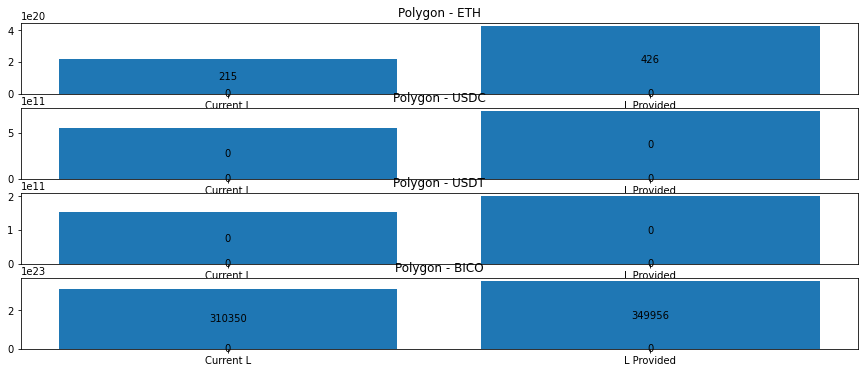

In [117]:
from src.read import *
from src.arbitrage import *
liquidity_pools = read_liquidity_pools()
supported_assets = read_supported_assets()
rpcs = get_rpcs(liquidity_pools)
max_profit = -1
amount_in = 0.0
best_opportunity_blockchain = ''
best_opportunity_asset = ''
assets = supported_assets['Asset'].tolist()
asset_prices = get_prices(assets)
wallet_balance_eth = get_wallet_balance_eth()
wallet_balance_usdc = wallet_balance_eth * asset_prices["USDC"]

fig, axs = plt.subplots(4,1, figsize=(15, 6), facecolor='w', edgecolor='k')
#fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()

for blockchain in list(rpcs.keys())[:2]:
    api = rpcs[blockchain]
    for i, supported_assets_row in supported_assets.iterrows():
        asset = supported_assets_row['Address']
        asset_symbol = supported_assets_row['Asset']
        asset_price = asset_prices[asset_symbol]
        equilibrium_liquidity = api.get_equilibrium_liquidity(asset)
        liquidity = api.get_current_liquidity(asset)
        incentive_pool = api.get_rewards(asset)
        axs[i].bar(['Current L','L Provided'],[liquidity,equilibrium_liquidity])
        axs[i].text(x='Current L', y=liquidity/2,            s=int(liquidity/1e18),horizontalalignment='center',verticalalignment='center')
        axs[i].text(x='L Provided',y=equilibrium_liquidity/2,s=int(equilibrium_liquidity/1e18),horizontalalignment='center',verticalalignment='center')
        axs[i].set_title(blockchain+" - "+asset_symbol)
        

### TESTS

In [70]:
import json
from pathlib import Path

from web3 import Web3

from src.constants import PATH_TO_PASSWORDS, PATH_TO_DATA
key = Path(PATH_TO_PASSWORDS + 'POKT_KEY.txt').read_text().replace('\n', '')
pk1 = Path(PATH_TO_PASSWORDS + 'pk1.txt').read_text().replace('\n', '')
blockchain_gateway = 'eth-goerli'
url = 'https://eth-rinkeby.gateway.pokt.network/v1/lb/62b2cdf2123e6f00397e943e'
w3 = Web3(Web3.HTTPProvider(url))

In [80]:
def send_tx(address_from, pk_from, address_to, amount):
    account_from = {
        "private_key": pk_from,
        "address": address_from,
    }

    w3.eth.set_gas_price_strategy(rpc_gas_price_strategy)
    tx_create = w3.eth.account.sign_transaction(
        {
            "nonce": w3.eth.get_transaction_count(account_from["address"]),
            "gasPrice": 150000000000,
            "gas": 3000000,
            "to": address_to,
            "value": amount,
            'chainId': w3.eth.chain_id,
        },
        account_from["private_key"],
    )

    # 6. Send tx and wait for receipt
    tx_hash = w3.eth.send_raw_transaction(tx_create.rawTransaction)
    tx_receipt = w3.eth.wait_for_transaction_receipt(tx_hash)

    print(f"Transaction successful with hash: { tx_receipt.transactionHash.hex() }")

In [76]:
address_from = '0xc5324030Ad7e485fD7f42DBDEb1611C3BfE97569'
address_to = '0x4dD079d0A3B9B862D77421558c7c4E13f3a9cBc0'
amount = w3.eth.get_balance(address_from)/2
amount

2.5e+17

In [77]:
send_tx(address_from, pk1, address_to, 20)

Transaction successful with hash: 0x6ad4e5c9c0b60d232d0f68620f074e3f84b816f6f5f01af9fff72ac20672d789


In [ ]:
anyswap_address = '0x273a4fFcEb31B8473D51051Ad2a2EdbB7Ac8Ce02'
